In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [11]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.shape

(11251, 13)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
df.shape

(11239, 13)

In [17]:
df['Amount']=df['Amount'].astype('int')

In [18]:
df['Amount'].dtypes

dtype('int32')

In [19]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Anaylsis

# Gender

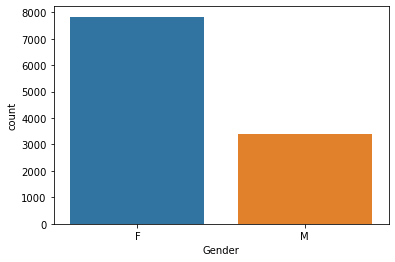

In [20]:
ax = sns.countplot(x='Gender',data = df)

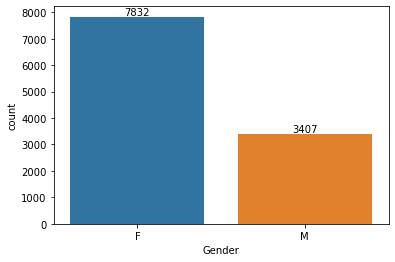

In [22]:
ax = sns.countplot(x='Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

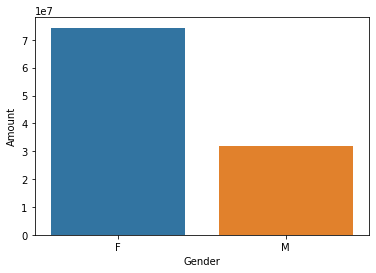

In [24]:
sales_gn = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x = 'Gender',y = 'Amount', data = sales_gn)

From the above graphs we can conclude that most of the buyers are females and the amount spend by female is also grater than men.

# Age

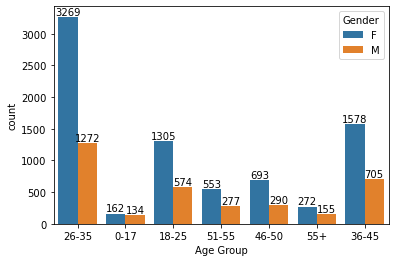

In [25]:
ax = sns.countplot(data = df ,x = 'Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

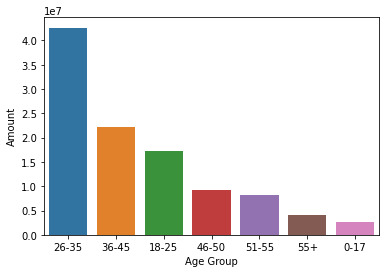

In [27]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x = 'Age Group',y = 'Amount', data = sales_age)

From the above graphs, it is clear that the age group that has purchased the most are 26-35 females.

# State

<AxesSubplot:xlabel='State', ylabel='Orders'>

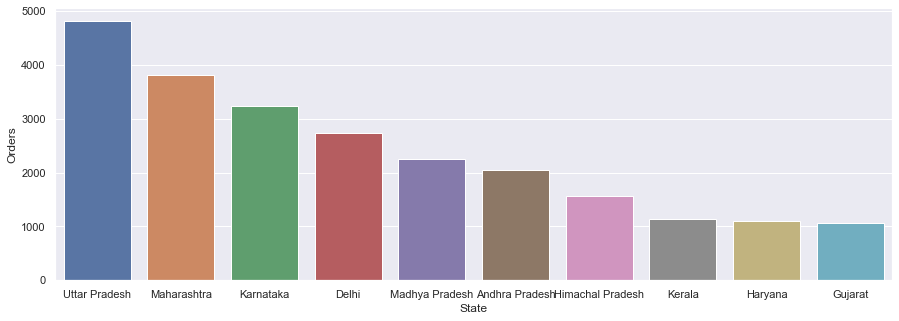

In [33]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State',y = 'Orders', data = sales_state)

<AxesSubplot:xlabel='State', ylabel='Amount'>

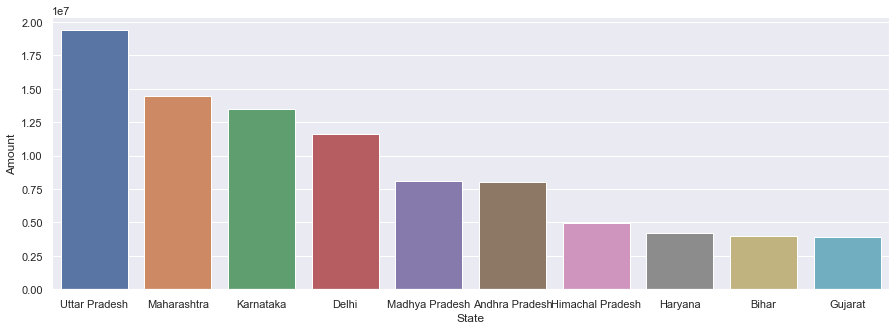

In [34]:
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State',y = 'Amount', data = sales_state)

*From the above graphs we can see that total orders and purchase amount are from the states Uttar Pradesh , Maharashtra and Karnataka*

# Marital Status

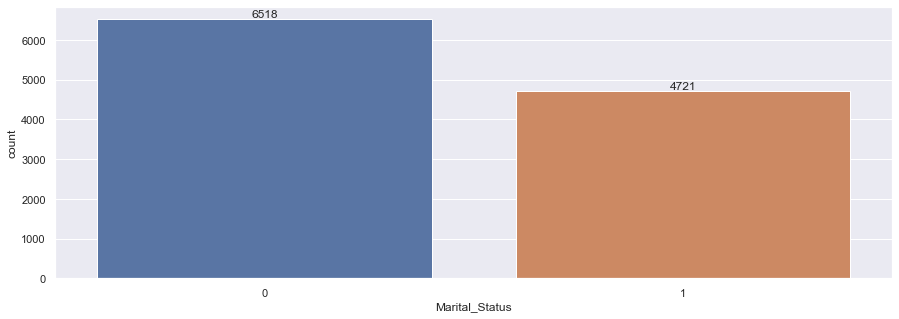

In [36]:
ax = sns.countplot(data = df ,x = 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

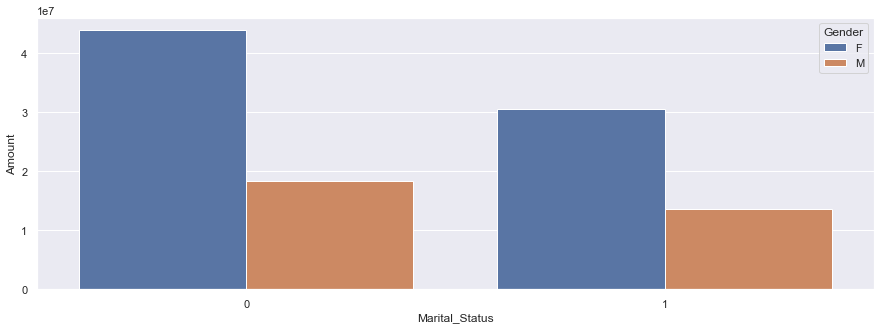

In [39]:
sales_ms = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'Marital_Status',y = 'Amount', data = sales_ms, hue='Gender')

People who are married and are females have purchased more.

# Occupation

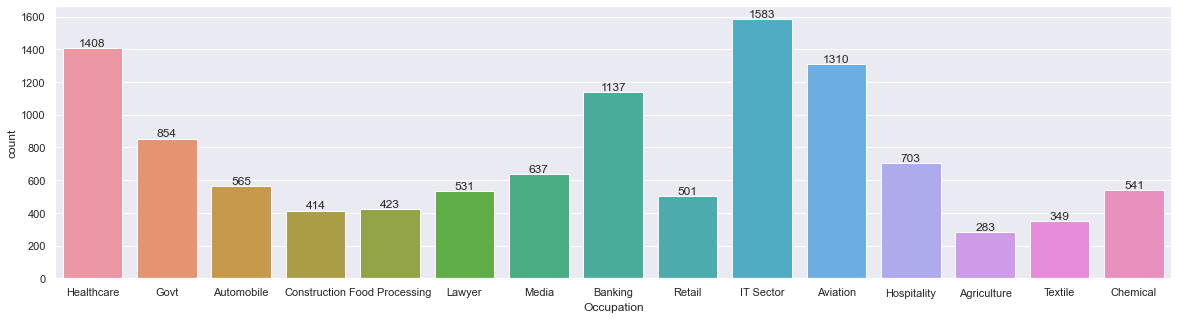

In [42]:
ax = sns.countplot(data = df ,x = 'Occupation')

sns.set(rc = {'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

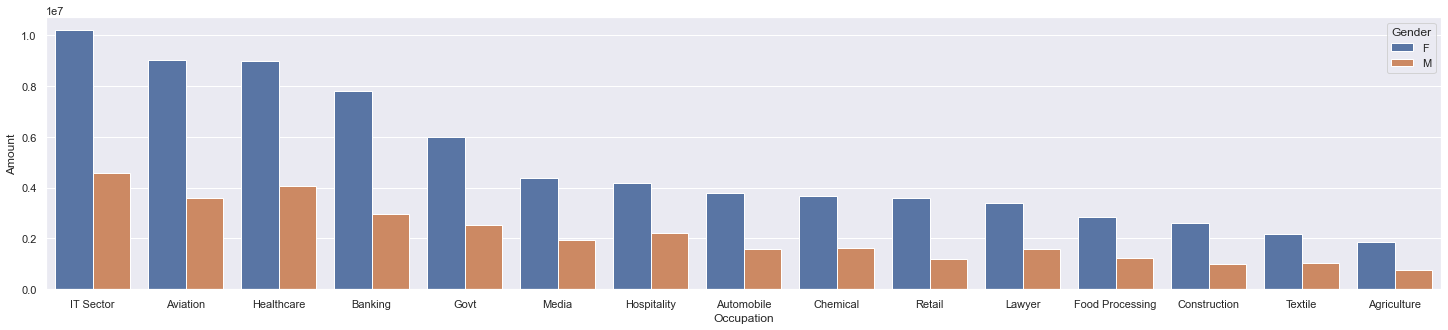

In [46]:
sales_occ = df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.set(rc = {'figure.figsize':(25,5)})
sns.barplot(x = 'Occupation',y = 'Amount', data = sales_occ, hue='Gender')

the buyers belonging to the IT sector are more and the amount spend more are the womens belonging to the IT sector.

# Product Category

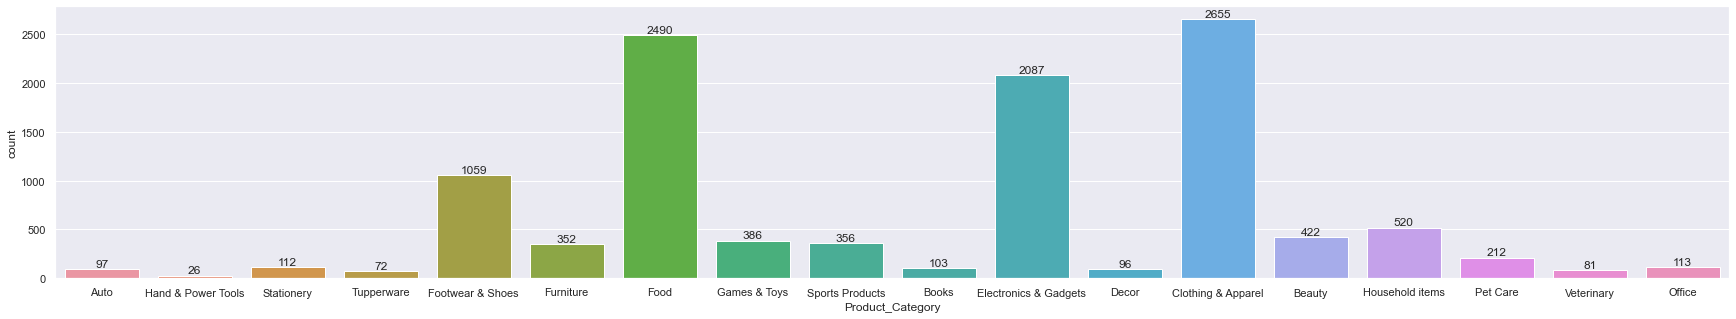

In [51]:
ax = sns.countplot(data = df ,x = 'Product_Category')

sns.set(rc = {'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

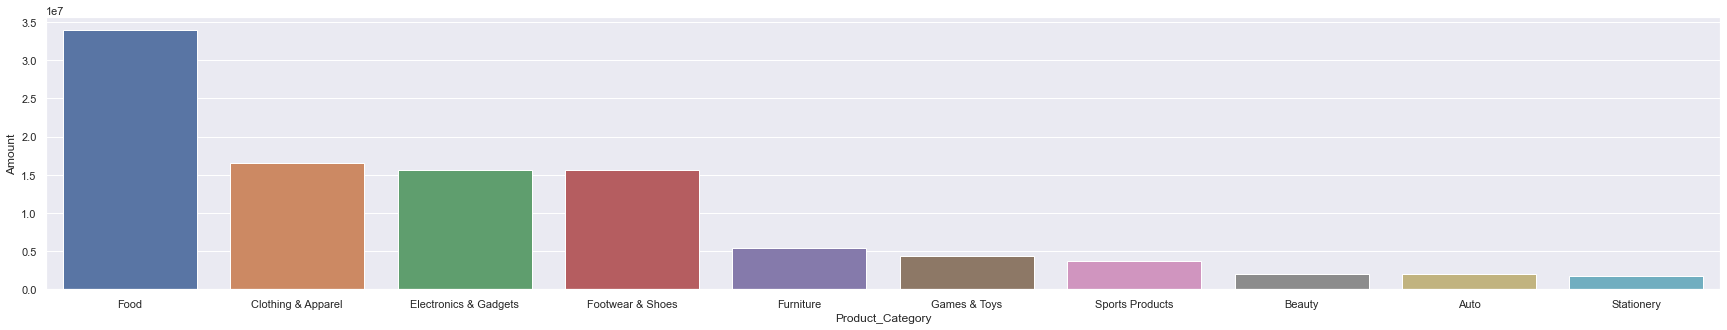

In [50]:
sales_pc = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

sns.set(rc = {'figure.figsize':(30,5)})
sns.barplot(x = 'Product_Category',y = 'Amount', data = sales_pc)

clothing and apparel , food and electronics & gadgets are the category people have spent most on.

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

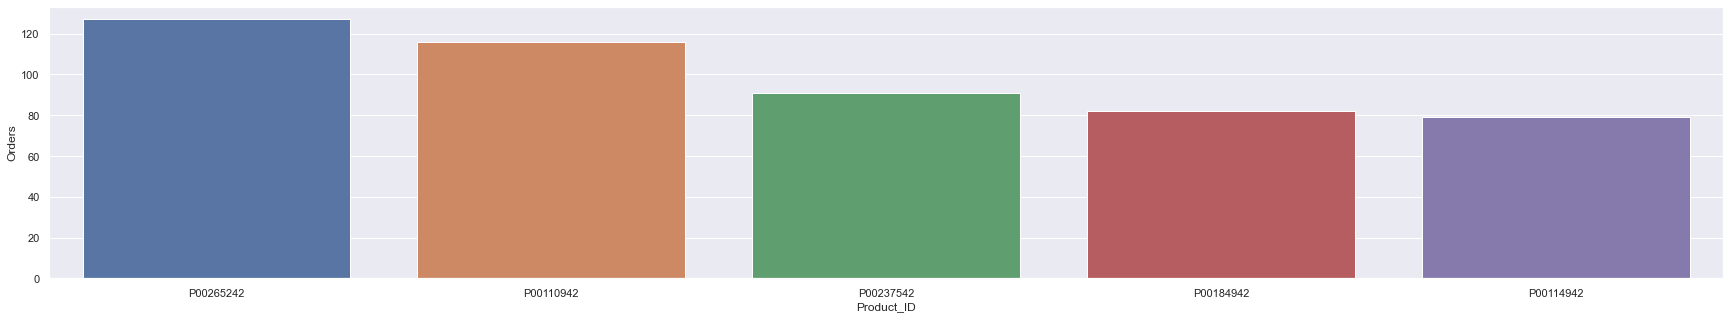

In [54]:
sales_id = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(5)

sns.set(rc = {'figure.figsize':(30,5)})
sns.barplot(x = 'Product_ID',y = 'Orders', data = sales_id)

# Conclusion

Married women belonging to the age group of 26-35 from UP, Mahrashtra and Karnataka working in IT , Healthcare and Aviation are more likely to buy products from Food , clothing and electronic category.